In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f1_laps = pd.read_csv("../data/f1_laps.csv")
f1_results = pd.read_csv("../data/f1_results.csv")

In [3]:
f1_laps.head()

,Year,Race,Driver,Team,LapNumber,LapTime_seconds,Position,TireCompound,TireAge
0,2024,1,VER,Red Bull Racing,1.0,97.284,1.0,1.0,4.0
1,2024,1,VER,Red Bull Racing,2.0,96.296,1.0,1.0,5.0
2,2024,1,VER,Red Bull Racing,3.0,96.753,1.0,1.0,6.0
3,2024,1,VER,Red Bull Racing,4.0,96.647,1.0,1.0,7.0
4,2024,1,VER,Red Bull Racing,5.0,97.173,1.0,1.0,8.0


In [4]:
f1_results.head()

,Year,Race,Driver,Team,Position,GridPosition,Points,Status
0,2024,1,M VERSTAPPEN,Red Bull Racing,1.0,1.0,26.0,Finished
1,2024,1,S PEREZ,Red Bull Racing,2.0,5.0,18.0,Finished
2,2024,1,C SAINZ,Ferrari,3.0,4.0,15.0,Finished
3,2024,1,C LECLERC,Ferrari,4.0,2.0,12.0,Finished
4,2024,1,G RUSSELL,Mercedes,5.0,3.0,10.0,Finished


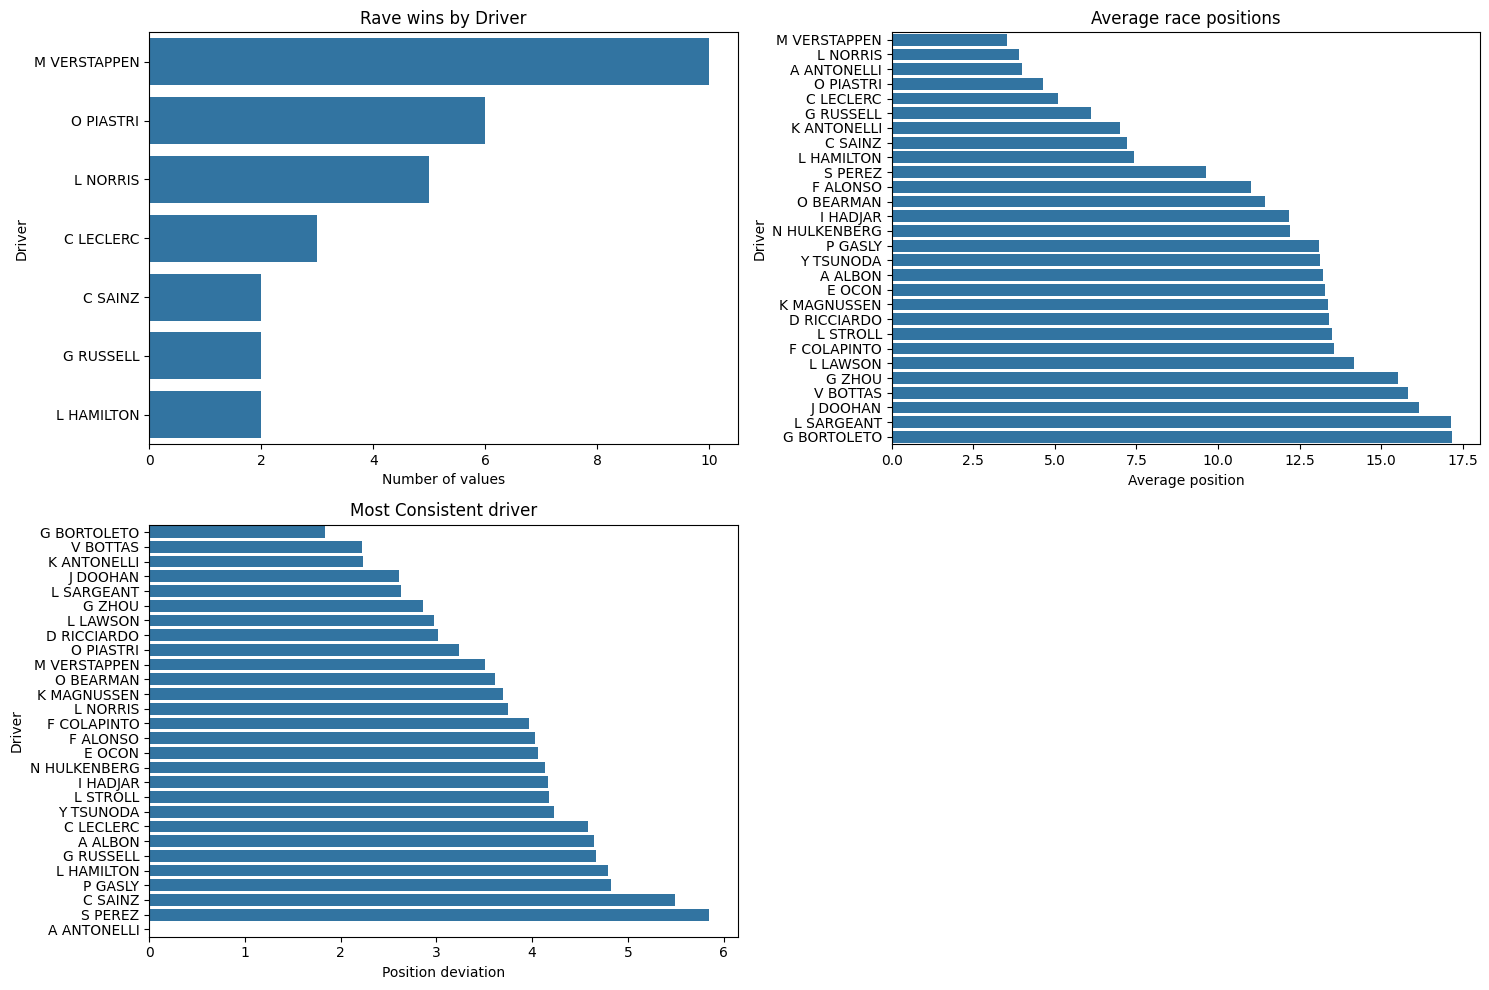

In [5]:
#Driver wins
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
winners = f1_results[f1_results['Position'] == 1]['Driver'].value_counts()
sns.barplot(x=winners.values, y=winners.index)
plt.title("Rave wins by Driver")
plt.xlabel("Number of values")

#Average finishing position by driver
plt.subplot(2, 2, 2)
avg_positions = f1_results.groupby('Driver')['Position'].mean().sort_values()
sns.barplot(x=avg_positions.values, y=avg_positions.index)
plt.title("Average race positions")
plt.xlabel("Average position")


#driver consistency
plt.subplot(2, 2, 3)
consistency = f1_results.groupby('Driver')['Position'].std().sort_values()
sns.barplot(x=consistency.values, y=consistency.index)
plt.title('Most Consistent driver')
plt.xlabel("Position deviation")


plt.tight_layout()
plt.show()

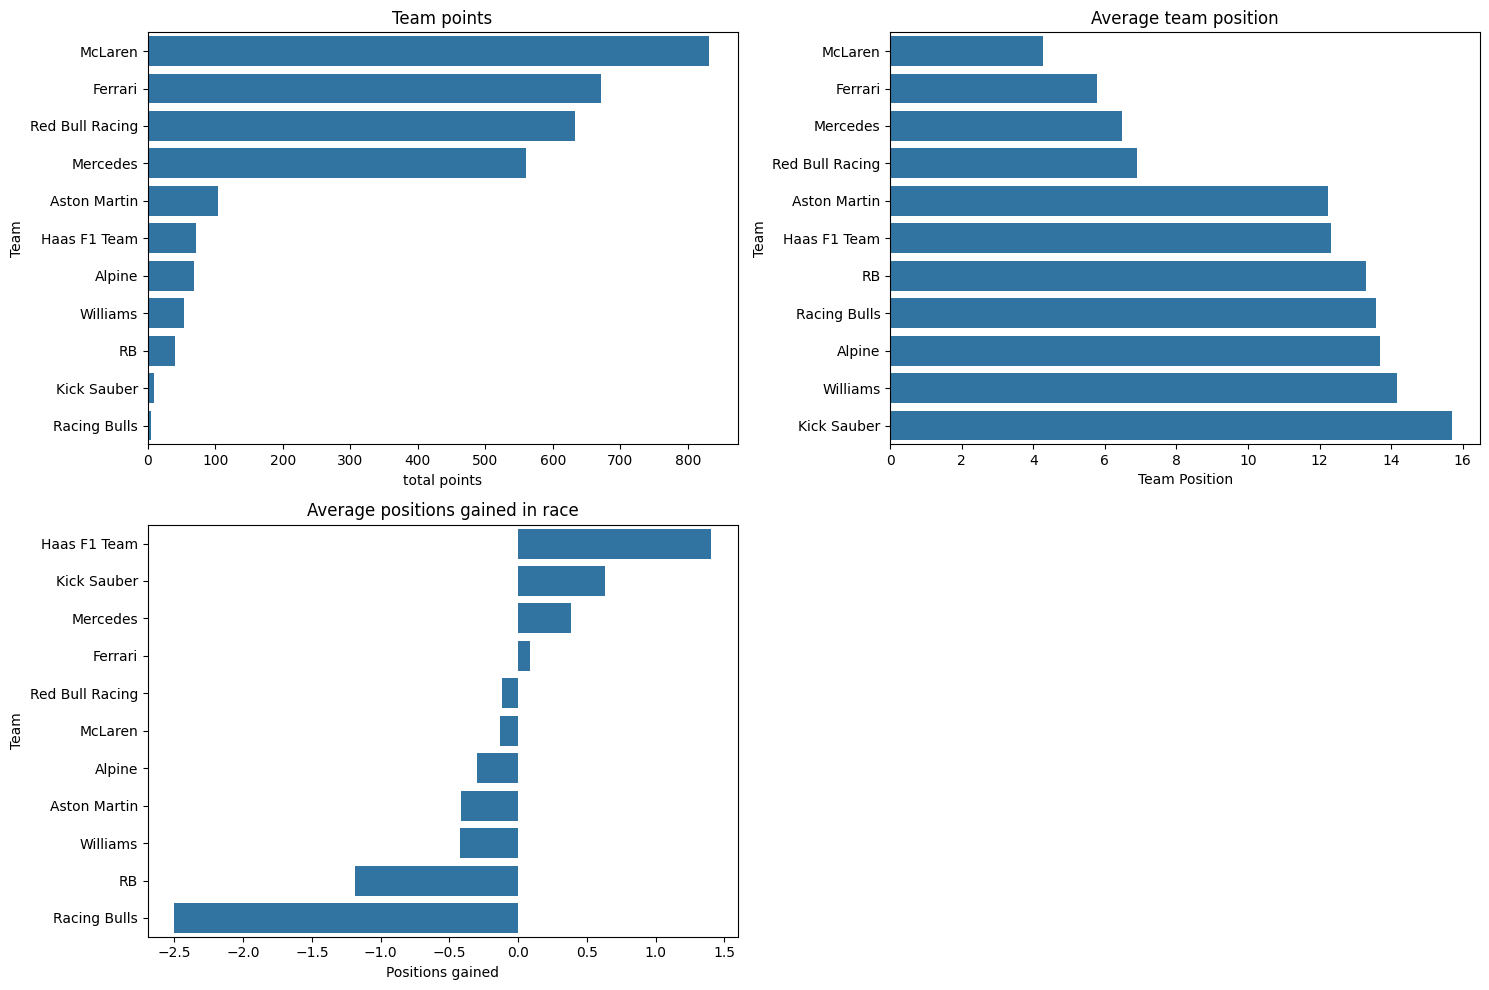

In [6]:
plt.figure(figsize=(15, 10))

#team points
plt.subplot(2, 2, 1)
team_points = f1_results.groupby('Team')['Points'].sum().sort_values(ascending=False)
sns.barplot(x=team_points.values, y=team_points.index)
plt.title("Team points")
plt.xlabel("total points")

#team average position
plt.subplot(2, 2, 2)
team_positions = f1_results.groupby('Team')['Position'].mean().sort_values()
sns.barplot(x=team_positions.values, y=team_positions.index)
plt.title("Average team position")
plt.xlabel("Team Position")


#Position gained or lost by the team in the race
plt.subplot(2, 2, 3)
f1_results['PositionChange'] = f1_results['GridPosition'] - f1_results['Position']
team_imporve = f1_results.groupby('Team')['PositionChange'].mean().sort_values(ascending=False)
sns.barplot(x=team_imporve.values, y=team_imporve.index)
plt.title("Average positions gained in race")
plt.xlabel("Positions gained")

plt.tight_layout()
plt.show()

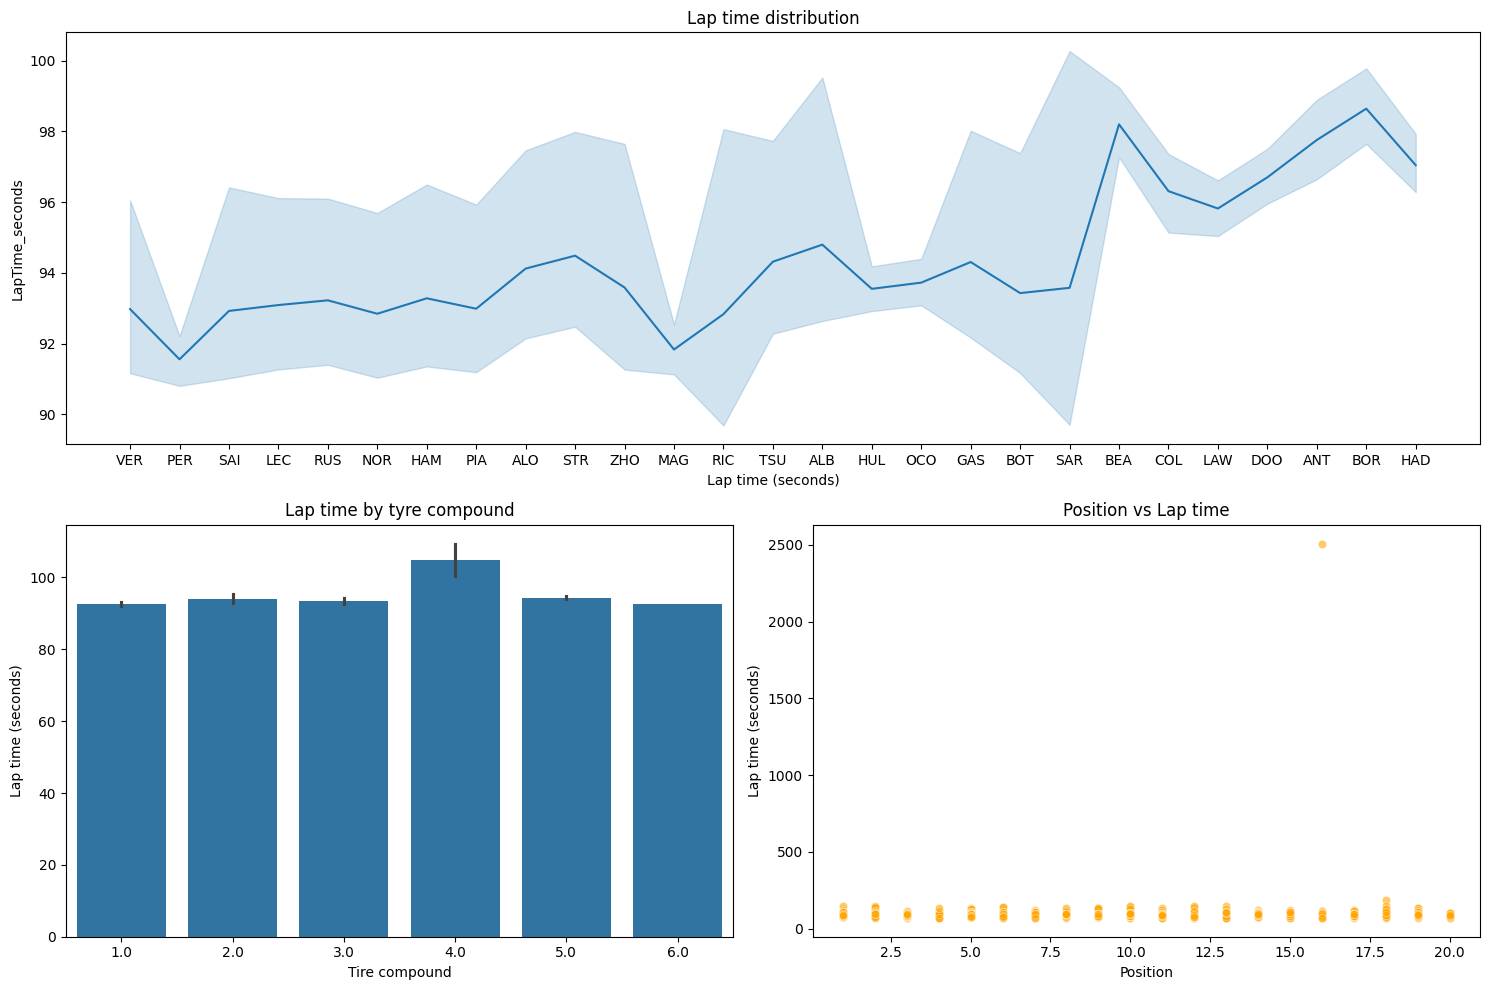

In [7]:
plt.figure(figsize=(15, 10))

#lap time distribution
plt.subplot(2, 1, 1)
sns.lineplot(data=f1_laps,x='Driver', y='LapTime_seconds')
plt.title("Lap time distribution")
plt.xlabel("Lap time (seconds)")

#lap time by tyre compound
plt.subplot(2, 2, 3)
sns.barplot(data=f1_laps, x='TireCompound', y='LapTime_seconds')
plt.title("Lap time by tyre compound")
plt.xlabel("Tire compound")
plt.ylabel("Lap time (seconds)")


plt.subplot(2, 2, 4)
sns.scatterplot(data=f1_laps.sample(1000), x='Position', y='LapTime_seconds', 
                alpha=0.6, color='orange')
plt.title("Position vs Lap time")
plt.xlabel("Position")
plt.ylabel("Lap time (seconds)")


plt.tight_layout()
plt.show()

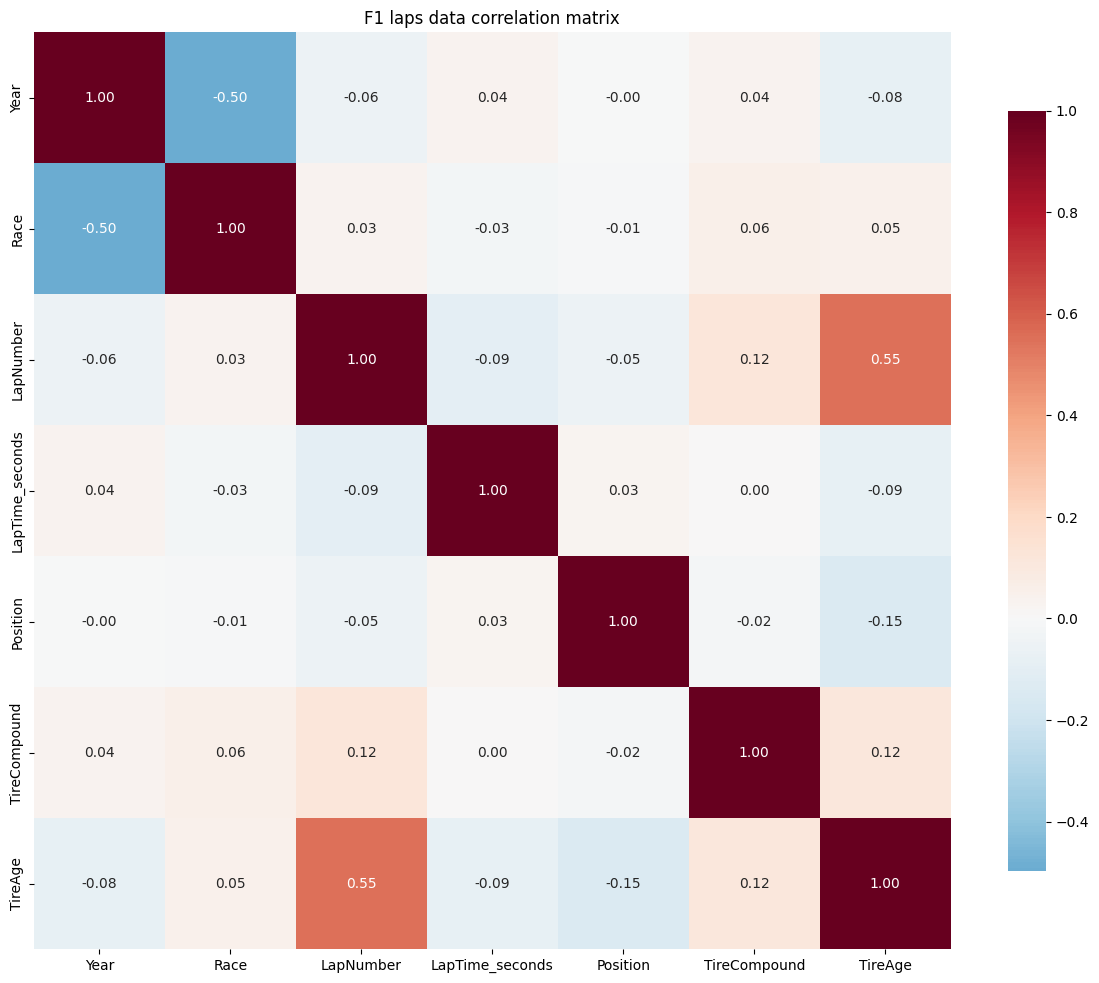

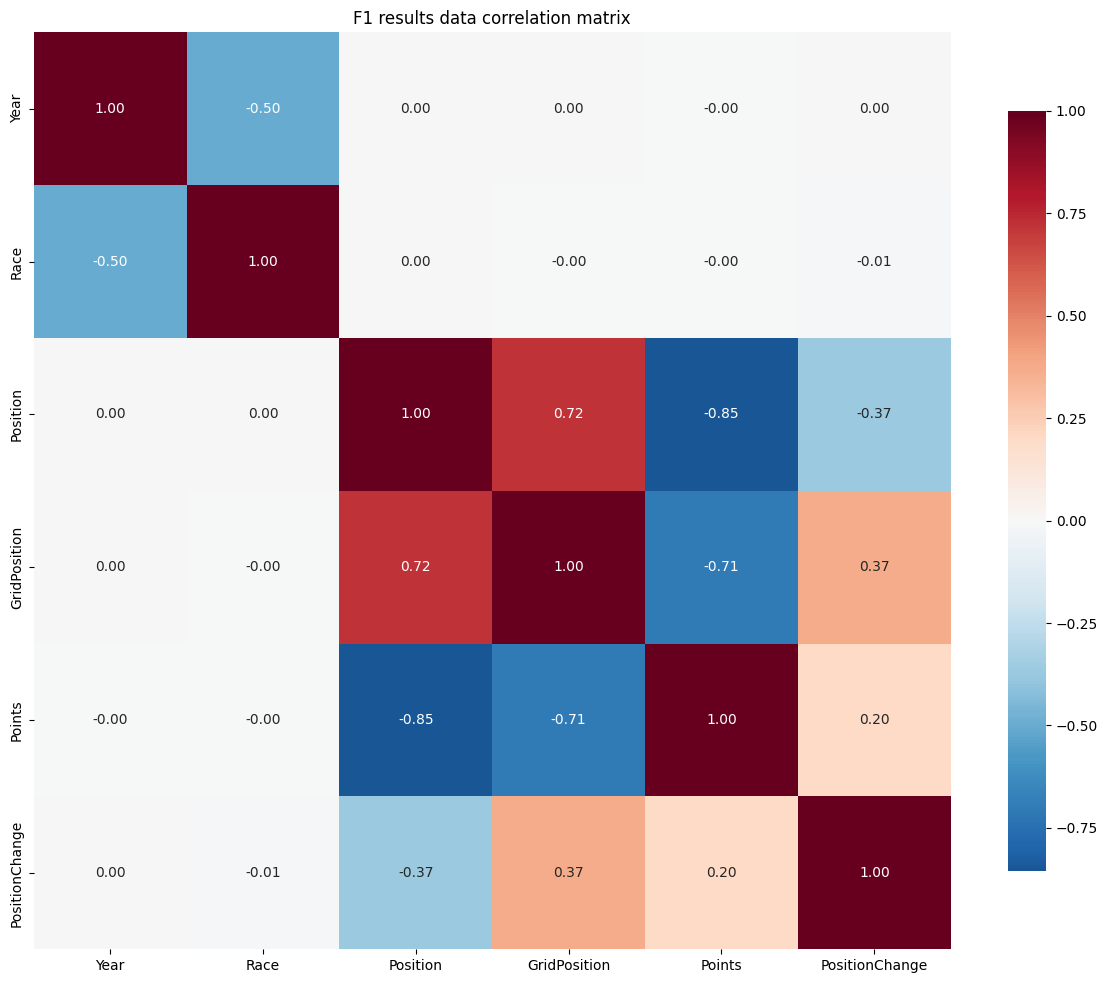

In [8]:
#correlation heatmap

numerical_cols = f1_laps.select_dtypes(include=[np.number]).columns
correlation_matrix = f1_laps[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("F1 laps data correlation matrix")
plt.tight_layout()
plt.show()


results_numer = f1_results.select_dtypes(include=[np.number]).columns
results_numerical = f1_results[results_numer].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(results_numerical, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("F1 results data correlation matrix")
plt.tight_layout()
plt.show()

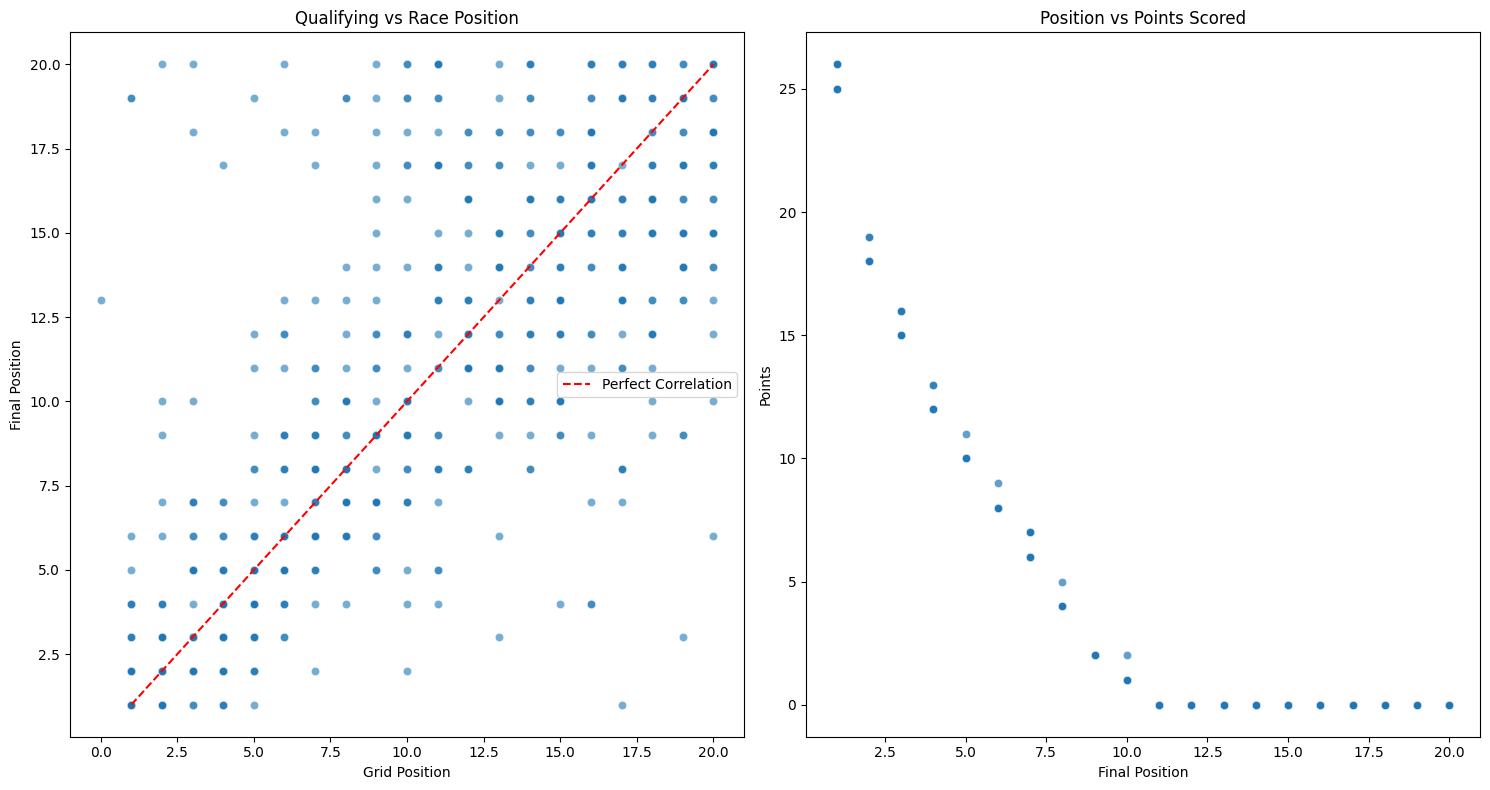

In [9]:
# === RACE STRATEGY PLOTS ===

plt.figure(figsize=(15, 8))

# Grid position vs final position
plt.subplot(1, 2, 1)
sns.scatterplot(data=f1_results, x='GridPosition', y='Position', alpha=0.6)
plt.plot([1, 20], [1, 20], 'r--', label='Perfect Correlation')
plt.title('Qualifying vs Race Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.legend()

# Points vs position relationship
plt.subplot(1, 2, 2)
sns.scatterplot(data=f1_results, x='Position', y='Points', alpha=0.7)
plt.title('Position vs Points Scored')
plt.xlabel('Final Position')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

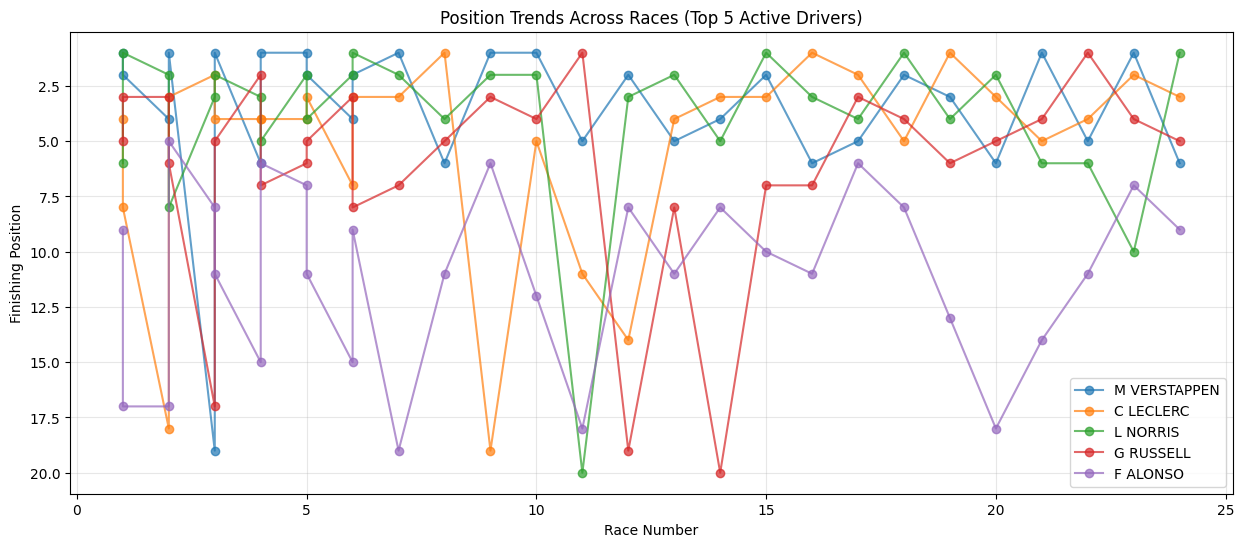

In [10]:
# === PERFORMANCE TRENDS ===

# Driver performance over races (example for top drivers)
top_drivers = f1_results['Driver'].value_counts().head(5).index

plt.figure(figsize=(15, 6))
for driver in top_drivers:
    driver_data = f1_results[f1_results['Driver'] == driver].sort_values('Race')
    plt.plot(driver_data['Race'], driver_data['Position'], "o-", label=driver, alpha=0.7)

plt.title('Position Trends Across Races (Top 5 Active Drivers)')
plt.xlabel('Race Number')
plt.ylabel('Finishing Position')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\rajay\AppData\Local\Temp\ipykernel_12496\2671890168.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=team_data, x='Team', y='Position', palette='Set2')
C:\Users\rajay\AppData\Local\Temp\ipykernel_12496\2671890168.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=f1_laps.dropna(), x='PositionGroup', y='LapTime_seconds', palette='viridis')
C:\Users\rajay\AppData\Local\Temp\ipykernel_12496\2671890168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.values, y=status_counts.index, palette='tab10'

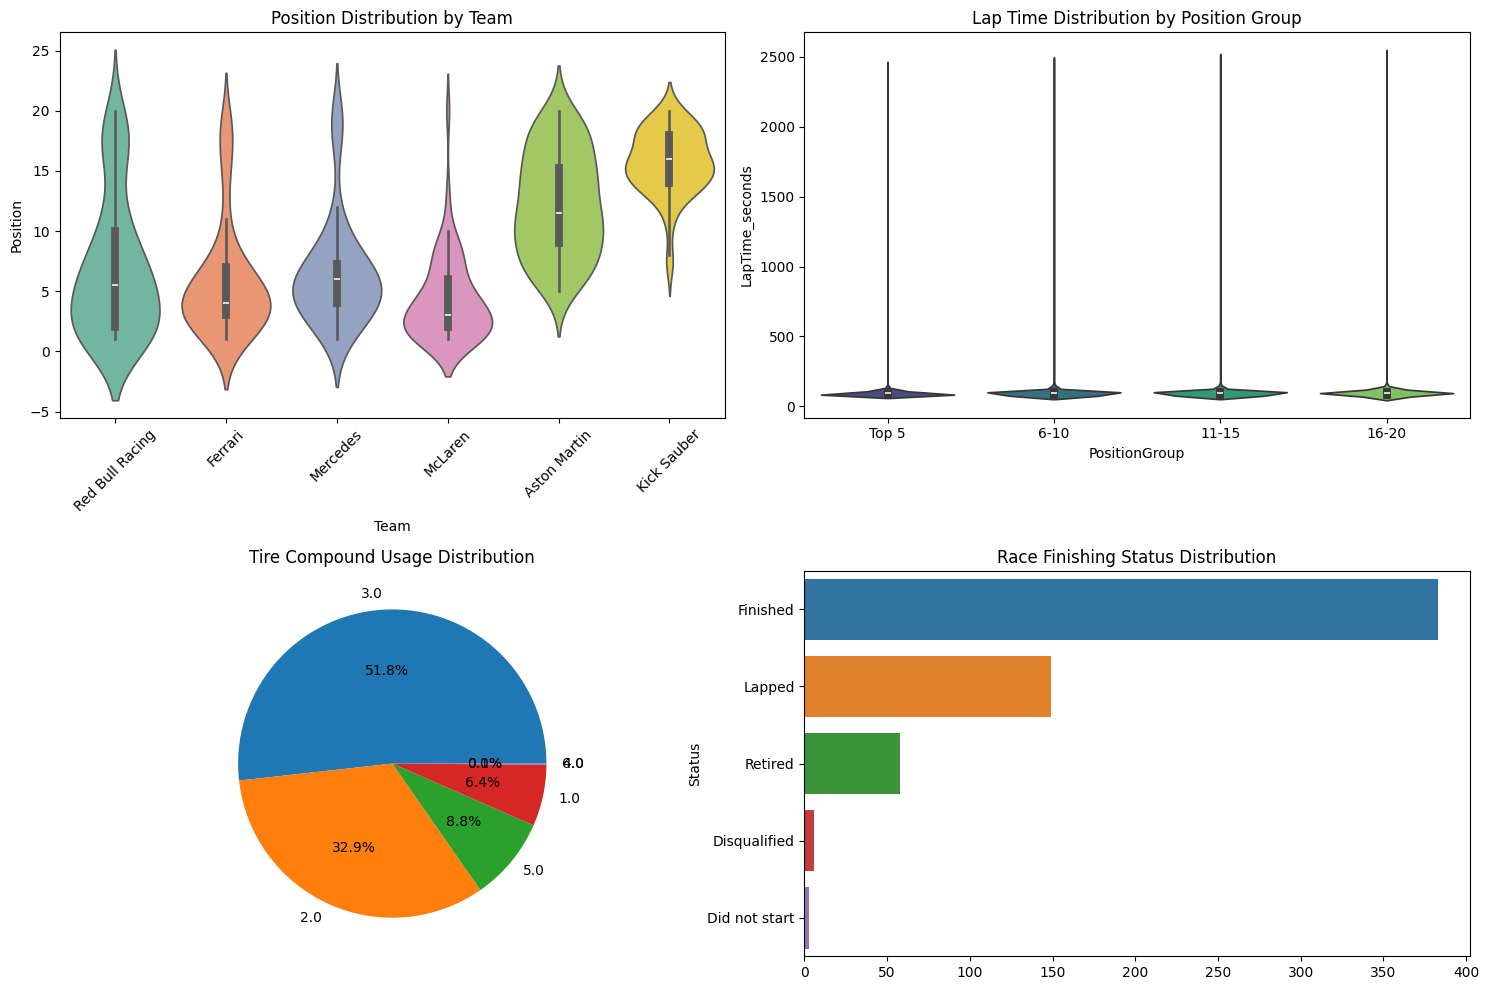

In [11]:
# === ADVANCED DISTRIBUTION PLOTS ===

plt.figure(figsize=(15, 10))

# Driver performance distribution
plt.subplot(2, 2, 1)
top_teams = f1_results['Team'].value_counts().head(6).index
team_data = f1_results[f1_results['Team'].isin(top_teams)]
sns.violinplot(data=team_data, x='Team', y='Position', palette='Set2')
plt.title('Position Distribution by Team')
plt.xticks(rotation=45)

# Lap time distribution by position group
plt.subplot(2, 2, 2)
f1_laps['PositionGroup'] = pd.cut(f1_laps['Position'], 
                                  bins=[0, 5, 10, 15, 20], 
                                  labels=['Top 5', '6-10', '11-15', '16-20'])
sns.violinplot(data=f1_laps.dropna(), x='PositionGroup', y='LapTime_seconds', palette='viridis')
plt.title('Lap Time Distribution by Position Group')

# Tire compound usage
plt.subplot(2, 2, 3)
tire_counts = f1_laps['TireCompound'].value_counts()
plt.pie(tire_counts.values, labels=tire_counts.index, autopct='%1.1f%%')
plt.title('Tire Compound Usage Distribution')

# Race finishing status
plt.subplot(2, 2, 4)
status_counts = f1_results['Status'].value_counts().head(8)
sns.barplot(x=status_counts.values, y=status_counts.index, palette='tab10')
plt.title('Race Finishing Status Distribution')

plt.tight_layout()
plt.show()

In [12]:
# Calculate driver statistics
driver_wins = f1_results[f1_results['Position'] == 1]['Driver'].value_counts()
driver_total_races = f1_results['Driver'].value_counts()
driver_win_rate = (driver_wins / driver_total_races * 100).fillna(0)

In [13]:
# 2. Merge feature
f1_laps = f1_laps.merge(driver_win_rate.rename('driver_win_rate'), 
                        left_on='Driver', right_index=True, how='left')
f1_results = f1_results.merge(driver_win_rate.rename('driver_win_rate'), 
                              left_on='Driver', right_index=True, how='left')
f1_laps['driver_win_rate'] = f1_laps['driver_win_rate'].fillna(0)
f1_results['driver_win_rate'] = f1_results['driver_win_rate'].fillna(0)


In [14]:
# Position change from start
f1_laps['start_position'] = f1_laps.groupby(['Driver', 'Race'])['Position'].transform('first')
f1_laps['positions_gained'] = f1_laps['start_position'] - f1_laps['Position']

# Tire degradation
f1_laps['tire_degradation'] = f1_laps.groupby(['Driver', 'Race', 'TireCompound'])['LapTime_seconds'].diff()

# Race phase
f1_laps['race_phase'] = pd.cut(f1_laps['LapNumber'], 
                               bins=[0, 15, 40, 100], 
                               labels=['Early', 'Middle', 'Late'])


In [15]:
# Team reliability
team_reliability = f1_results.groupby('Team').apply(
    lambda x: (x['Status'] == 'Finished').mean() * 100
)

f1_laps = f1_laps.merge(team_reliability.rename('team_reliability'), 
                        left_on='Team', right_index=True, how='left')
f1_results = f1_results.merge(team_reliability.rename('team_reliability'), 
                              left_on='Team', right_index=True, how='left')


C:\Users\rajay\AppData\Local\Temp\ipykernel_12496\39696473.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_reliability = f1_results.groupby('Team').apply(


In [16]:
# Race winners (for classification)
f1_results['race_winner'] = (f1_results['Position'] == 1).astype(int)
f1_results['podium_finish'] = (f1_results['Position'] <= 3).astype(int)
f1_results['points_finish'] = (f1_results['Position'] <= 10).astype(int)


In [17]:
f1_laps.head(10)

,Year,Race,Driver,Team,LapNumber,LapTime_seconds,Position,TireCompound,TireAge,PositionGroup,driver_win_rate,start_position,positions_gained,tire_degradation,race_phase,team_reliability
0,2024,1,VER,Red Bull Racing,1.0,97.284,1.0,1.0,4.0,Top 5,0.0,1.0,0.0,NaN,Early,83.333333
1,2024,1,VER,Red Bull Racing,2.0,96.296,1.0,1.0,5.0,Top 5,0.0,1.0,0.0,-0.988,Early,83.333333
2,2024,1,VER,Red Bull Racing,3.0,96.753,1.0,1.0,6.0,Top 5,0.0,1.0,0.0,0.457,Early,83.333333
3,2024,1,VER,Red Bull Racing,4.0,96.647,1.0,1.0,7.0,Top 5,0.0,1.0,0.0,-0.106,Early,83.333333
4,2024,1,VER,Red Bull Racing,5.0,97.173,1.0,1.0,8.0,Top 5,0.0,1.0,0.0,0.526,Early,83.333333
5,2024,1,VER,Red Bull Racing,6.0,97.092,1.0,1.0,9.0,Top 5,0.0,1.0,0.0,-0.081,Early,83.333333
6,2024,1,VER,Red Bull Racing,7.0,97.038,1.0,1.0,10.0,Top 5,0.0,1.0,0.0,-0.054,Early,83.333333
7,2024,1,VER,Red Bull Racing,8.0,97.024,1.0,1.0,11.0,Top 5,0.0,1.0,0.0,-0.014,Early,83.333333
8,2024,1,VER,Red Bull Racing,9.0,97.229,1.0,1.0,12.0,Top 5,0.0,1.0,0.0,0.205,Early,83.333333
9,2024,1,VER,Red Bull Racing,10.0,96.960,1.0,1.0,13.0,Top 5,0.0,1.0,0.0,-0.269,Early,83.333333


In [18]:
f1_laps.isnull().sum()

Year                   0
Race                   0
Driver                 0
Team                   0
LapNumber              0
LapTime_seconds        0
Position               0
TireCompound           0
TireAge                0
PositionGroup          0
driver_win_rate        0
start_position         0
positions_gained       0
tire_degradation    1101
race_phase             0
team_reliability       0
dtype: int64

In [19]:
f1_results.head(10)

,Year,Race,Driver,Team,Position,GridPosition,Points,Status,PositionChange,driver_win_rate,team_reliability,race_winner,podium_finish,points_finish
0,2024,1,M VERSTAPPEN,Red Bull Racing,1.0,1.0,26.0,Finished,0.0,33.333333,83.333333,1,1,1
1,2024,1,S PEREZ,Red Bull Racing,2.0,5.0,18.0,Finished,3.0,0.000000,83.333333,0,1,1
2,2024,1,C SAINZ,Ferrari,3.0,4.0,15.0,Finished,1.0,6.896552,90.000000,0,1,1
3,2024,1,C LECLERC,Ferrari,4.0,2.0,12.0,Finished,-2.0,10.000000,90.000000,0,0,1
4,2024,1,G RUSSELL,Mercedes,5.0,3.0,10.0,Finished,-2.0,6.666667,91.666667,0,0,1
5,2024,1,L NORRIS,McLaren,6.0,7.0,8.0,Finished,1.0,16.666667,98.333333,0,0,1
6,2024,1,L HAMILTON,Mercedes,7.0,9.0,6.0,Finished,2.0,6.666667,91.666667,0,0,1
7,2024,1,O PIASTRI,McLaren,8.0,8.0,4.0,Finished,0.0,20.000000,98.333333,0,0,1
8,2024,1,F ALONSO,Aston Martin,9.0,6.0,2.0,Finished,-3.0,0.000000,55.000000,0,0,1
9,2024,1,L STROLL,Aston Martin,10.0,12.0,1.0,Finished,2.0,0.000000,55.000000,0,0,1


In [20]:
f1_results.isnull().sum()

Year                0
Race                0
Driver              0
Team                0
Position            0
GridPosition        0
Points              0
Status              0
PositionChange      0
driver_win_rate     0
team_reliability    0
race_winner         0
podium_finish       0
points_finish       0
dtype: int64

In [21]:
f1_laps['tire_degradation'].value_counts()

tire_degradation
 0.000     138
 0.018      41
 0.021      39
 0.068      37
 0.083      37
          ... 
 11.943      1
 15.542      1
-3.660       1
-27.837      1
 2.728       1
Name: count, Length: 9570, dtype: int64

In [22]:
f1_laps.describe()

,Year,Race,LapNumber,LapTime_seconds,Position,TireCompound,TireAge,driver_win_rate,start_position,positions_gained,tire_degradation,team_reliability
count,32688.000000,32688.000000,32688.000000,32688.000000,32688.000000,32688.000000,32688.000000,32688.0,32688.000000,32688.000000,31587.000000,32688.000000
mean,2024.186062,10.792860,29.961515,93.699427,9.795001,2.718551,14.554485,0.0,10.542156,0.747155,-0.814539,64.814911
std,0.389163,7.024923,17.877068,54.550588,5.427972,0.927227,11.027344,0.0,5.623811,3.485045,31.231504,24.820756
min,2024.000000,1.000000,1.000000,67.694000,1.000000,1.000000,0.000000,0.0,1.000000,-18.000000,-2441.736000,25.000000
25%,2024.000000,5.000000,15.000000,83.045000,5.000000,2.000000,6.000000,0.0,6.000000,-1.000000,-0.325000,41.666667
50%,2024.000000,10.000000,29.000000,92.607000,10.000000,3.000000,12.000000,0.0,10.000000,1.000000,-0.016000,65.000000
75%,2024.000000,17.000000,44.000000,98.614000,14.000000,3.000000,21.000000,0.0,15.000000,3.000000,0.269000,90.000000
max,2025.000000,24.000000,78.000000,2526.253000,20.000000,6.000000,78.000000,0.0,20.000000,15.000000,64.019000,98.333333


In [23]:
f1_laps['tire_degradation'] = f1_laps['tire_degradation'].fillna(f1_laps['tire_degradation'].median())

In [24]:
f1_laps.isnull().sum()

Year                0
Race                0
Driver              0
Team                0
LapNumber           0
LapTime_seconds     0
Position            0
TireCompound        0
TireAge             0
PositionGroup       0
driver_win_rate     0
start_position      0
positions_gained    0
tire_degradation    0
race_phase          0
team_reliability    0
dtype: int64

In [25]:
f1_laps.to_csv("../data/f1_laps_features.csv", index=False)
f1_results.to_csv("../data/f1_results_features.csv", index=False)